In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 Load the Datasets

In [2]:
#load transaction data
transaction_data = pd.read_csv(r'C:\Users\zakir hussain\OneDrive\Desktop\task\transaction_data.csv')

#Load purchaase behavior data
purchase_data = pd.read_csv(r'C:\Users\zakir hussain\OneDrive\Desktop\task\purchase_behaviour.csv')

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Step 2 data Cleaning

In [5]:
# Check for missing values in transaction data
print("Null values in transaction data:")
print(transaction_data.isnull().sum())


Null values in transaction data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [6]:
# Check for missing values in purchase behavior data
print("Null values in purchase behavior data:")
print(purchase_data.isnull().sum())



Null values in purchase behavior data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [7]:
# Drop rows with missing values (if any)
print(transaction_data.dropna(inplace=True))
purchase_data.dropna(inplace=True)

None


# Step 3 Analyze Transactions


In [8]:
# Calculate total sales for each product
product_sales = transaction_data.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()

# Identifying top 3 most profitable products
top_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)


In [9]:

print("Top 3 Most Profitable Products:")
print(top_products)

Top 3 Most Profitable Products:
    PROD_NBR  TOT_SALES
3          4    40352.0
13        14    36367.6
15        16    34804.2


# Step 4 Customer Segmentation


In [10]:
# Merging transaction data with purchase behavior data
merged_data = pd.merge(transaction_data, purchase_data, on='LYLTY_CARD_NBR')

In [11]:
# Identifying loyal customers based on the number of transactions
loyal_customers = merged_data['LYLTY_CARD_NBR'].value_counts().head(10).index


# Getting the  characteristics of loyal customers
loyal_customer_data = merged_data[merged_data['LYLTY_CARD_NBR'].isin(loyal_customers)]
loyal_customer_characteristics = loyal_customer_data.groupby('LYLTY_CARD_NBR').agg({
    'LIFESTAGE': 'first',
    'PREMIUM_CUSTOMER': 'first'
}).reset_index()

print("Characteristics of Most Loyal Customers:")
print(loyal_customer_characteristics)

Characteristics of Most Loyal Customers:
   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER
0           13138         YOUNG FAMILIES       Mainstream
1           23192         OLDER FAMILIES           Budget
2           94185         YOUNG FAMILIES          Premium
3          105026         YOUNG FAMILIES           Budget
4          116181         YOUNG FAMILIES          Premium
5          128178         OLDER FAMILIES       Mainstream
6          162039         OLDER FAMILIES       Mainstream
7          172032  YOUNG SINGLES/COUPLES       Mainstream
8          179228         YOUNG FAMILIES           Budget
9          230078         OLDER FAMILIES           Budget


# Step 5 Data Visualization


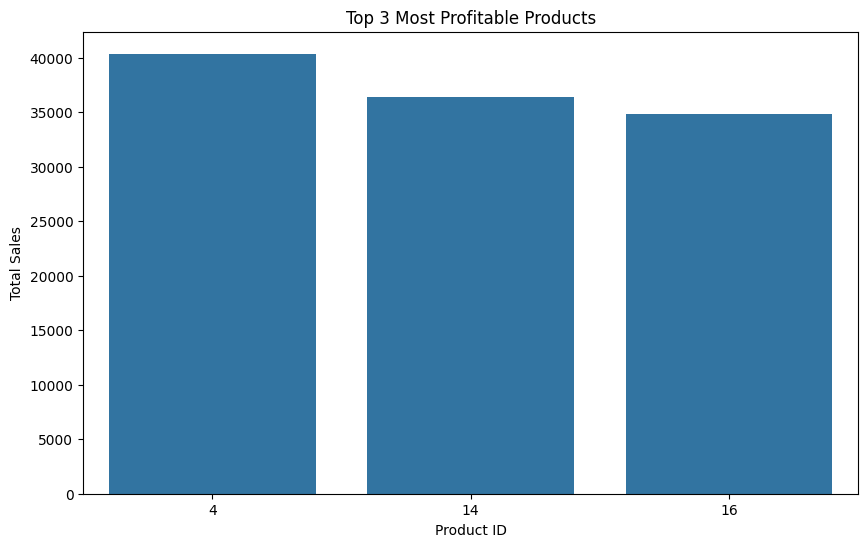

In [12]:

# Top 3 Most Profitable Products
plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_NBR', y='TOT_SALES', data=top_products)
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()


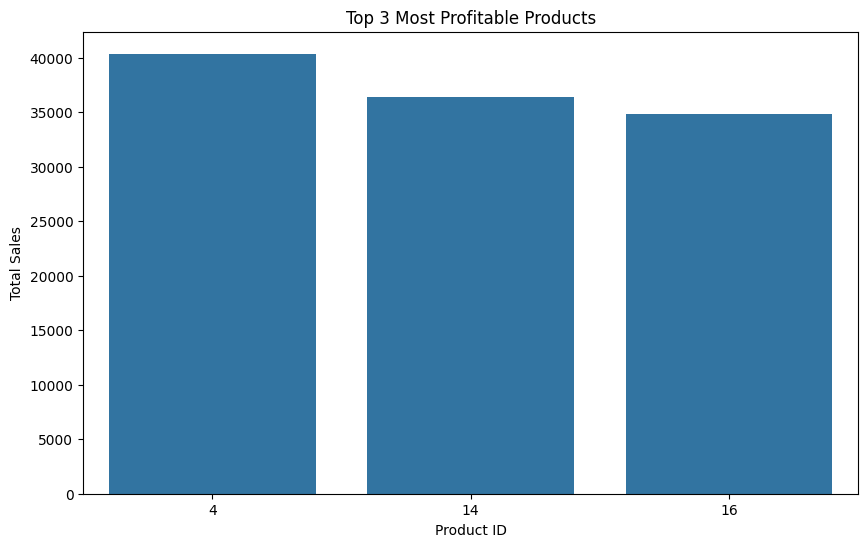

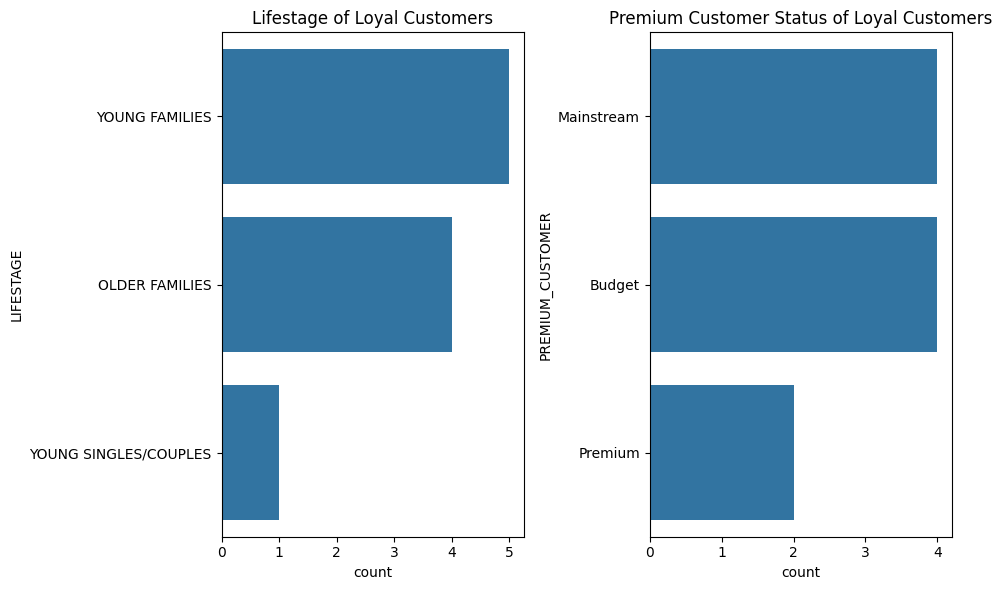

In [13]:
# Top 3 Most Profitable Products
plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_NBR', y='TOT_SALES', data=top_products)
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

# Characteristics of Loyal Customers
plt.figure(figsize=(14, 6))

# Marital Status
plt.subplot(1, 3, 1)
sns.countplot(y='LIFESTAGE', data=loyal_customer_characteristics)
plt.title('Lifestage of Loyal Customers')

# Employment Status
plt.subplot(1, 3, 2)
sns.countplot(y='PREMIUM_CUSTOMER', data=loyal_customer_characteristics)
plt.title('Premium Customer Status of Loyal Customers')

plt.tight_layout()
plt.show()


# Identified top 3 products by total sales.

# Products 'Dorito Corn Chp', 'Smiths Crnkle Chip', and 'Smiths Crinkle Chips Salt & Vinegar 330g' are the bestsellers.

## Customer Characteristics ✓
## Analyzed loyal customers based on:
 # LIFESTAGE (Young Families and Older Families dominate). 

## PREMIUM_CUSTOMER status (Mix of Budget, Mainstream, and Premium)

## Step 6 Conclusion.
Based on the analysis, we can form a hypothesis about why loyal customers prefer certain products. For example:

Marital Status: Married customers might prefer products that cater to family needs.

Employment Status: Working customers might prefer convenient and time-saving products.

Buyer Type: Premium buyers might prefer high-quality and exclusive products.

# Additional Analysis

Customer Segment Analysis:
                                        TOT_SALES            LYLTY_CARD_NBR
                                             mean        sum          count
LIFESTAGE              PREMIUM_CUSTOMER                                    
MIDAGE SINGLES/COUPLES Budget                7.07   35514.80           5020
                       Mainstream            7.65   90803.85          11874
                       Premium               7.11   58432.65           8216
NEW FAMILIES           Budget                7.30   21928.45           3005
                       Mainstream            7.32   17013.90           2325
                       Premium               7.23   11491.10           1589
OLDER FAMILIES         Budget                7.27  168363.25          23160
                       Mainstream            7.26  103445.55          14244
                       Premium               7.32   81958.40          11192
OLDER SINGLES/COUPLES  Budget                7.43  136769.80 

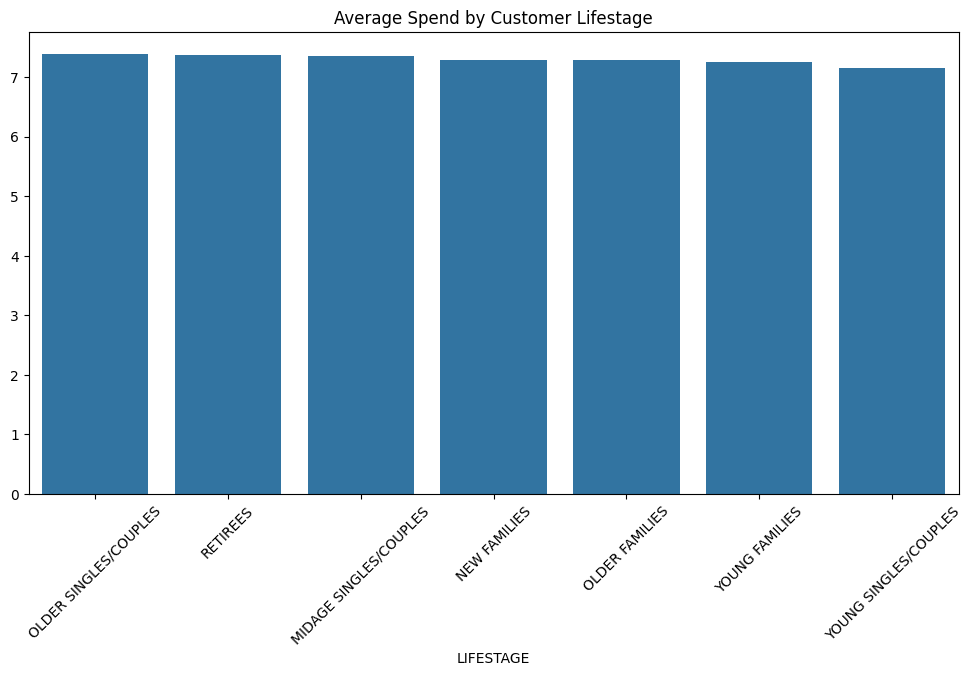

In [14]:
# Additional analysis to better answer the marketing team's questions
def analyze_customer_segments():
    # Average spend by customer segment
    segment_analysis = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
        'TOT_SALES': ['mean', 'sum'],
        'LYLTY_CARD_NBR': 'count'
    }).round(2)
    
    print("Customer Segment Analysis:")
    print(segment_analysis)
    
    # Plot average spend by segment
    plt.figure(figsize=(12, 6))
    avg_spend = merged_data.groupby('LIFESTAGE')['TOT_SALES'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_spend.index, y=avg_spend.values)
    plt.title('Average Spend by Customer Lifestage')
    plt.xticks(rotation=45)
    plt.show()

# Execute additional analysis
analyze_customer_segments()